In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("emlak_veri.csv",encoding="utf-8")

In [3]:
# ilk beş satır
df 

,url,price,İlan Numarası,İlan Güncelleme Tarihi,Kategorisi,Net Metrekare,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Krediye Uygunluk,...,Balkon Tipi,Kira Getirisi,Balkon Metrekare,Eşya Durumu,İpotek Durumu,Salon Metrekare,WC Metrekare,Pafta,Ada,Parsel
0,https://www.emlakjet.com//ilan/10-yillik-dogal...,1.200.000 TL,14435185,22 Aralık 2023,Satılık,100 M2,2+1,Düz Giriş (Zemin),Kombi Doğalgaz,Krediye Uygun,...,Açık Balkon,7000 TL,40 M2,Boş,Yok,18 M2,10 M2,0,1384,19
1,https://www.emlakjet.com//ilan/doganay-gayrime...,3.300.000 TL,14431060,21 Aralık 2023,Satılık,170 M2,5+1,3.Kat,Merkezi Kömür,Krediye Uygun,...,Açık Balkon,7000 TL,40 M2,Boş,Yok,18 M2,10 M2,0,1384,19
2,https://www.emlakjet.com//ilan/danis-gayrimenk...,1.320.000 TL,14428038,20 Aralık 2023,Satılık,55 M2,1+1,2.Kat,Yerden Isıtma,Krediye Uygun,...,Açık Balkon,7000 TL,40 M2,Boş,Yok,18 M2,10 M2,0,1384,19
3,https://www.emlakjet.com//ilan/akhisar-resatbe...,1.850.000 TL,14426047,21 Aralık 2023,Satılık,90 M2,2+1,1.Kat,Kombi Doğalgaz,Krediye Uygun,...,Açık Balkon,7000 TL,40 M2,Boş,Yok,18 M2,10 M2,0,1384,19
4,https://www.emlakjet.com//ilan/manisa-yunusemr...,1.575.000 TL,14416218,23 Aralık 2023,Satılık,60 M2,1+1,2.Kat,Kombi Doğalgaz,Krediye Uygun,...,Açık Balkon,4000 TL,6 M2,Boş,Yok,18 M2,10 M2,0,1384,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,https://www.emlakjet.com//ilan/isbay-group-dan...,2.190.000 TL,14316850,22 Aralık 2023,Satılık,200 M2,4+1,Çatı Dubleks,Kombi Doğalgaz,Krediye Uygun,...,Açık Balkon,7000 TL,40 M2,Boş,Yok,18 M2,10 M2,0,1384,19
716,https://www.emlakjet.com//ilan/golmarmara-da-s...,850.000 TL,14315302,28 Kasım 2023,Satılık,75 M2,2+1,3.Kat,Kombi Doğalgaz,Krediye Uygun Değil,...,Açık Balkon,7000 TL,40 M2,Boş,Yok,18 M2,10 M2,0,1384,19
717,https://www.emlakjet.com//ilan/dialog-dostlar-...,12.000.000 TL,14315301,28 Kasım 2023,Satılık,230 M2,5+1,3.Kat,Kombi Doğalgaz,Krediye Uygun,...,Açık Balkon,7000 TL,40 M2,Boş,Yok,18 M2,10 M2,0,1384,19
718,https://www.emlakjet.com//ilan/dialog-dostlard...,1.350.000 TL,14315300,28 Kasım 2023,Satılık,110 M2,3+1,3.Kat,Klimalı,Krediye Uygun,...,Açık Balkon,7000 TL,40 M2,Boş,Yok,18 M2,10 M2,0,1384,19


In [4]:
df.columns

Index(['url', 'price', 'İlan Numarası', 'İlan Güncelleme Tarihi', 'Kategorisi',
       'Net Metrekare', 'Oda Sayısı', 'Bulunduğu Kat', 'Isıtma Tipi',
       'Krediye Uygunluk', 'Banyo Sayısı', 'İlan Oluşturma Tarihi', 'Türü',
       'Tipi', 'Brüt Metrekare', 'Binanın Yaşı', 'Binanın Kat Sayısı',
       'Kullanım Durumu', 'Site İçerisinde', 'Fiyat Durumu', 'Balkon Durumu',
       'Banyo Metrekare', 'Yapı Durumu', 'Balkon Sayısı', 'Zemin Etüdü',
       'Yatırıma Uygunluk', 'Tapu Durumu', 'Takas', 'WC Sayısı',
       'Görüntülü Gezilebilir mi?', 'Yapı Tipi', 'Aidat', 'Balkon Tipi',
       'Kira Getirisi', 'Balkon Metrekare', 'Eşya Durumu', 'İpotek Durumu',
       'Salon Metrekare', 'WC Metrekare', 'Pafta', 'Ada', 'Parsel'],
      dtype='object')

In [5]:
# Veri İle İlgili kısa bilgiler : veri türü, boş alan var yok 
df.drop('İlan Numarası', axis=1, inplace=True)
df.drop('İlan Güncelleme Tarihi', axis=1, inplace=True)
df.drop('url', axis=1, inplace=True)
df.drop('Balkon Sayısı', axis=1, inplace=True)
df.drop('İlan Oluşturma Tarihi', axis=1, inplace=True)
df.drop('Brüt Metrekare', axis=1, inplace=True)
df.drop('Balkon Durumu', axis=1, inplace=True)
df.drop('Tapu Durumu', axis=1, inplace=True)
df.drop('İpotek Durumu', axis=1, inplace=True)
df.drop('Görüntülü Gezilebilir mi?', axis=1, inplace=True)
df.drop('Kira Getirisi', axis=1, inplace=True)
df.drop('WC Metrekare', axis=1, inplace=True)
df.drop('Banyo Metrekare', axis=1, inplace=True)
df.drop('Balkon Tipi', axis=1, inplace=True)
df.drop('Fiyat Durumu', axis=1, inplace=True)
df.drop('Zemin Etüdü', axis=1, inplace=True)
df.drop('Balkon Metrekare', axis=1, inplace=True)
df.drop('Parsel', axis=1, inplace=True)
df.drop('Ada', axis=1, inplace=True)
df.drop('Pafta', axis=1, inplace=True)
df.drop('Salon Metrekare', axis=1, inplace=True)
df.drop('Kategorisi', axis=1, inplace=True)
df.drop('Krediye Uygunluk', axis=1, inplace=True)
df.drop('Binanın Kat Sayısı', axis=1, inplace=True)
df.drop('Kullanım Durumu', axis=1, inplace=True)
df.drop('Yatırıma Uygunluk', axis=1, inplace=True)
df.drop('Türü', axis=1, inplace=True)
# tüm kolonlar nümerik iken ocean_proximity (okyanusa yakınlık) object
df.info() #analiz 20433 olan veriler eksik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            720 non-null    object
 1   Net Metrekare    720 non-null    object
 2   Oda Sayısı       720 non-null    object
 3   Bulunduğu Kat    720 non-null    object
 4   Isıtma Tipi      720 non-null    object
 5   Banyo Sayısı     720 non-null    object
 6   Tipi             720 non-null    object
 7   Binanın Yaşı     720 non-null    object
 8   Site İçerisinde  720 non-null    object
 9   Yapı Durumu      720 non-null    object
 10  Takas            720 non-null    object
 11  WC Sayısı        720 non-null    object
 12  Yapı Tipi        720 non-null    object
 13  Aidat            720 non-null    object
 14  Eşya Durumu      720 non-null    object
dtypes: object(15)
memory usage: 84.5+ KB


In [6]:
df = df.rename(columns = {"price":"fiyat",
                     "Net Metrekare":"net_metrekare",
                     "Oda Sayısı":"oda_sayısı",
                     "Bulunduğu Kat":"dairenin_katı",
                     "Isıtma Tipi":"ısıtma",
                     "Banyo Sayısı":"banyo_sayısı",
                     "Tipi":"tipi",
                     "Binanın Yaşı":"bina_yaşı",
                     "Site İçerisinde":"site_içerisinde",
                     "Yapı Durumu":"yapı_durumu",
                     "Takas":"takas",
                     "WC Sayısı":"wc_sayısı",
                     "Yapı Tipi":"yapı_tipi",
                     "Aidat":"aidat",
                     "Eşya Durumu":"eşya_durumu",
                     })

In [7]:
df.head()

,fiyat,net_metrekare,oda_sayısı,dairenin_katı,ısıtma,banyo_sayısı,tipi,bina_yaşı,site_içerisinde,yapı_durumu,takas,wc_sayısı,yapı_tipi,aidat,eşya_durumu
0,1.200.000 TL,100 M2,2+1,Düz Giriş (Zemin),Kombi Doğalgaz,1,Daire,5-10,Hayır,İkinci El,Yok,2,Betonarme,1 TL,Boş
1,3.300.000 TL,170 M2,5+1,3.Kat,Merkezi Kömür,2,Daire,0 (Yeni),Hayır,İkinci El,Yok,2,Betonarme,1 TL,Boş
2,1.320.000 TL,55 M2,1+1,2.Kat,Yerden Isıtma,1,Daire,0 (Yeni),Hayır,Sıfır,Var,1,Betonarme,1 TL,Boş
3,1.850.000 TL,90 M2,2+1,1.Kat,Kombi Doğalgaz,1,Daire,0 (Yeni),Hayır,Sıfır,Var,1,Betonarme,1 TL,Boş
4,1.575.000 TL,60 M2,1+1,2.Kat,Kombi Doğalgaz,1,Daire,1,Hayır,İkinci El,Yok,2,Betonarme,150 TL,Boş


In [8]:
# describe() metodu ile nümerik alanların istatistiksel özelliklerini görelim
df.describe()

,fiyat,net_metrekare,oda_sayısı,dairenin_katı,ısıtma,banyo_sayısı,tipi,bina_yaşı,site_içerisinde,yapı_durumu,takas,wc_sayısı,yapı_tipi,aidat,eşya_durumu
count,720,720,720,720,720,720,720,720,720,720,720,720,720,720,720
unique,246,102,14,20,14,5,7,9,2,2,2,5,4,15,2
top,1.750.000 TL,120 M2,3+1,3.Kat,Kombi Doğalgaz,1,Daire,21 Ve Üzeri,Hayır,İkinci El,Yok,2,Betonarme,1 TL,Boş
freq,22,74,330,176,539,571,675,181,668,670,487,597,716,632,700


In [9]:
df.fiyat = df.fiyat.str.replace('TL', '')

In [10]:
df.tipi.value_counts()

tipi
Daire          675
Müstakil Ev     26
Villa           11
Köy Evi          4
Yazlık           2
Bina             1
Dağ Evi          1
Name: count, dtype: int64

In [11]:
df.yapı_durumu.value_counts()

yapı_durumu
İkinci El    670
Sıfır         50
Name: count, dtype: int64

In [12]:
df.loc[df.yapı_durumu == "Belirtilmemiş", "yapı_durumu"] = "İkinci El"

In [13]:
df["net_metrekare"] = df.net_metrekare.str.replace('M2', '')
df.net_metrekare.value_counts()

net_metrekare
120     74
90      57
85      45
125     45
80      44
        ..
185      1
400      1
232      1
63       1
101      1
Name: count, Length: 102, dtype: int64

In [14]:
df.bina_yaşı.value_counts()

bina_yaşı
21 Ve Üzeri    181
0 (Yeni)       133
5-10           121
16-20           76
4               70
11-15           65
3               29
1               28
2               17
Name: count, dtype: int64

In [15]:
df.loc[df.bina_yaşı == "0 (Yeni)", "bina_yaşı"] = "0-5"
df.loc[df.bina_yaşı == "0 (Yeni)", "bina_yaşı"] = "0-5"
df.loc[df.bina_yaşı == "1", "bina_yaşı"] = "0-5"
df.loc[df.bina_yaşı == "2", "bina_yaşı"] = "0-5"
df.loc[df.bina_yaşı == "3", "bina_yaşı"] = "0-5"
df.loc[df.bina_yaşı == "4", "bina_yaşı"] = "0-5"
df.loc[df.bina_yaşı == "16-20", "bina_yaşı"] = "10-25"
df.loc[df.bina_yaşı == "5-10", "bina_yaşı"] = "5-10"
df.loc[df.bina_yaşı == "21 Ve Üzeri", "bina_yaşı"] = "10-25"
df.loc[df.bina_yaşı == "11-15", "bina_yaşı"] = "10-25"

In [16]:
#df["aidat"] = df.aidat.str.replace('TL','')
#df.loc[df.aidat == "TL", "aidat"] = "0 TL"
df.loc[df.aidat == "0 TL", "aidat"] = "0"
#df.loc[df.aidat == "0", "aidat"] = "0 TL"
df.loc[df.aidat == "Belirtilmemiş", "aidat"] = "0"
df.loc[df.aidat == "5 TL", "aidat"] = "1-500"
df.loc[df.aidat == "1 TL", "aidat"] = "1-500"
df.loc[df.aidat == "100 TL", "aidat"] = "1-500"
df.loc[df.aidat == "150 TL", "aidat"] = "1-500"
df.loc[df.aidat == "80 TL", "aidat"] = "1-500"
df.loc[df.aidat == "120 TL", "aidat"] = "1-500"
df.loc[df.aidat == "25 TL", "aidat"] = "1-500"
df.loc[df.aidat == "200 TL", "aidat"] = "1-500"
df.loc[df.aidat == "75 TL", "aidat"] = "1-500"
df.loc[df.aidat == "70 TL", "aidat"] = "1-500"
df.loc[df.aidat == "50 TL", "aidat"] = "1-500"
df.loc[df.aidat == "2250 TL", "aidat"] = "500-1000"
df.loc[df.aidat == "1000 TL", "aidat"] = "500-1000"
df.loc[df.aidat == "130 TL", "aidat"] = "1-500"

In [17]:
df.aidat.value_counts()

aidat
1-500       689
0            29
500-1000      2
Name: count, dtype: int64

In [18]:
df.wc_sayısı.value_counts()

wc_sayısı
2      597
1      111
3        8
4        3
Yok      1
Name: count, dtype: int64

In [19]:
df.loc[df.wc_sayısı == "Yok", "wc_sayısı"] = 0
df.loc[df.wc_sayısı == "Belirtilmemiş", "wc_sayısı"] = 0
df.wc_sayısı.value_counts()

wc_sayısı
2    597
1    111
3      8
4      3
0      1
Name: count, dtype: int64

In [20]:
df.ısıtma.value_counts()

ısıtma
Kombi Doğalgaz         539
Sobalı                  47
Jeotermal               24
Isıtma Yok              22
Merkezi Kömür           20
Klimalı                 18
Merkezi Doğalgaz        15
Yerden Isıtma           13
Doğalgaz Sobalı          8
Kat Kaloriferi           6
Merkezi (Pay Ölçer)      5
Isı Pompası              1
Kombi Kömür              1
Şömine                   1
Name: count, dtype: int64

In [21]:
df.loc[df.ısıtma == "Doğalgaz Sobalı", "ısıtma"] = "doğalgaz"
df.loc[df.ısıtma == "Isı Pompası", "ısıtma"] = "diğer"
df.loc[df.ısıtma == "Jeotermal", "ısıtma"] = "diğer"
df.loc[df.ısıtma == "Kat Kaloriferi", "ısıtma"] = "doğalgaz"
df.loc[df.ısıtma == "Klimalı", "ısıtma"] = "klimalı"
df.loc[df.ısıtma == "Kombi Doğalgaz", "ısıtma"] = "doğalgaz"
df.loc[df.ısıtma == "Kombi Kömür", "ısıtma"] = "doğalgaz"
df.loc[df.ısıtma == "Merkezi (Pay Ölçer)", "ısıtma"] = "diğer"
df.loc[df.ısıtma == "Merkezi Doğalgaz", "ısıtma"] = "doğalgaz"
df.loc[df.ısıtma == "Merkezi Kömür", "ısıtma"] = "sobalı"
df.loc[df.ısıtma == "Sobalı", "ısıtma"] = "sobalı"
df.loc[df.ısıtma == "Yerden Isıtma", "ısıtma"] = "doğalgaz"
df.loc[df.ısıtma == "Şömine", "ısıtma"] = "şömine"
df.loc[df.ısıtma == "Isıtma Yok", "ısıtma"] = "sobalı"

In [22]:
df.oda_sayısı.value_counts()

oda_sayısı
3+1       330
2+1       277
1+1        43
4+1        31
5+1        16
4+2         4
1 Oda       4
6+1         4
6+2         4
2.5+1       2
8+1         2
9+ Oda      1
Stüdyo      1
5+2         1
Name: count, dtype: int64

In [23]:
df.loc[df.oda_sayısı == "1 Oda", "oda_sayısı"] = "1"
df.loc[df.oda_sayısı == "1+1", "oda_sayısı"] = "2"
df.loc[df.oda_sayısı == "2+1", "oda_sayısı"] = "3"
df.loc[df.oda_sayısı == "3+1", "oda_sayısı"] = "4"
df.loc[df.oda_sayısı == "4+1", "oda_sayısı"] = "4+"
df.loc[df.oda_sayısı == "4+2", "oda_sayısı"] = "4+"
df.loc[df.oda_sayısı == "5+1", "oda_sayısı"] = "4+"
df.loc[df.oda_sayısı == "5+2", "oda_sayısı"] = "4+"
df.loc[df.oda_sayısı == "6+1", "oda_sayısı"] = "4+"
df.loc[df.oda_sayısı == "6+2", "oda_sayısı"] = "4+"
df.loc[df.oda_sayısı == "8+1", "oda_sayısı"] = "4+"
df.loc[df.oda_sayısı == "9+ Oda", "oda_sayısı"] = "4+"
df.loc[df.oda_sayısı == "2.5+1", "oda_sayısı"] = "4+"
df.loc[df.oda_sayısı == "Stüdyo", "oda_sayısı"] = "1"

In [24]:
df.banyo_sayısı.value_counts()

banyo_sayısı
1      571
2      136
3        6
4        4
Yok      3
Name: count, dtype: int64

In [25]:
df.loc[df.banyo_sayısı == "Yok", "banyo_sayısı"] = 0
df.loc[df.banyo_sayısı == "5", "banyo_sayısı"] = 5
df.loc[df.banyo_sayısı == "2", "banyo_sayısı"] = 2
df.loc[df.banyo_sayısı == "1", "banyo_sayısı"] = 1
df.loc[df.banyo_sayısı == "3", "banyo_sayısı"] = 3
df.loc[df.banyo_sayısı == "4", "banyo_sayısı"] = 4

In [26]:
df.eşya_durumu.value_counts()

eşya_durumu
Boş       700
Eşyalı     20
Name: count, dtype: int64

In [27]:
df.yapı_tipi.value_counts()

yapı_tipi
Betonarme    716
Kagir          2
Prefabrik      1
Çelik          1
Name: count, dtype: int64

In [28]:
df.loc[df.yapı_tipi == "Belirtilmemiş", "yapı_tipi"] = "Betonarme"

In [29]:
df.takas.value_counts()

takas
Yok    487
Var    233
Name: count, dtype: int64

In [30]:
df.loc[df.takas == "Bel", "takas"] = "Yok"

In [31]:
df.dairenin_katı.value_counts()

dairenin_katı
3.Kat                176
2.Kat                155
4.Kat                 93
Yüksek Giriş          90
1.Kat                 72
5.Kat                 57
Düz Giriş (Zemin)     20
Çatı Dubleks          15
6.Kat                  7
Müstakil               7
Bahçe Katı             6
7.Kat                  5
Villa Tipi             4
Kot 4 (-4).Kat         3
Bahçe Dublex           3
Kot 1 (-1).Kat         3
15.Kat                 1
Kot 3 (-3).Kat         1
8.Kat                  1
12.Kat                 1
Name: count, dtype: int64

In [32]:
df.loc[df.dairenin_katı == "Yüksek Giriş", "dairenin_katı"] = "1-10"
df.loc[df.dairenin_katı == "Düz Giriş (Zemin)", "dairenin_katı"] = "1-10"
df.loc[df.dairenin_katı == "Yüksek Bodrum", "dairenin_katı"] = "-1"
df.loc[df.dairenin_katı == "Tam Bodrum", "dairenin_katı"] = "-1"
df.loc[df.dairenin_katı == "Yarı Bodrum", "dairenin_katı"] = "-1"
df.loc[df.dairenin_katı == "Müstakil", "dairenin_katı"] = "diğer"
df.loc[df.dairenin_katı == "Çatı Dubleks", "dairenin_katı"] = "1-10"
df.loc[df.dairenin_katı == "Çatı Katı", "dairenin_katı"] = "11-20"
df.loc[df.dairenin_katı == "Villa Tipi", "dairenin_katı"] = "diğer"
df.loc[df.dairenin_katı == "Bahçe Katı", "dairenin_katı"] = "1-10"
df.loc[df.dairenin_katı == "Bahçe Dublex", "dairenin_katı"] = "diğer"

In [33]:
df.loc[df.dairenin_katı == "1.Kat", "dairenin_katı"] = "1-10"
df.loc[df.dairenin_katı == "2.Kat", "dairenin_katı"] = "1-10"
df.loc[df.dairenin_katı == "3.Kat", "dairenin_katı"] = "1-10"
df.loc[df.dairenin_katı == "4.Kat", "dairenin_katı"] = "1-10"
df.loc[df.dairenin_katı == "5.Kat", "dairenin_katı"] = "1-10"
df.loc[df.dairenin_katı == "6.Kat", "dairenin_katı"] = "1-10"
df.loc[df.dairenin_katı == "7.Kat", "dairenin_katı"] = "1-10"
df.loc[df.dairenin_katı == "8.Kat", "dairenin_katı"] = "1-10"
df.loc[df.dairenin_katı == "9.Kat", "dairenin_katı"] = "1-10"
df.loc[df.dairenin_katı == "10.Kat", "dairenin_katı"] = "1-10"
df.loc[df.dairenin_katı == "12.Kat", "dairenin_katı"] = "11-20"
df.loc[df.dairenin_katı == "15.Kat", "dairenin_katı"] = "11-20"

In [34]:
df.loc[df.dairenin_katı == "Kot 1 (-1).Kat", "dairenin_katı"] = "-1"
df.loc[df.dairenin_katı == "Kot 4 (-4).Kat", "dairenin_katı"] = "-3"
df.loc[df.dairenin_katı == "Kot 3 (-3).Kat" , "dairenin_katı"] = "-3"

In [35]:
df.dairenin_katı.value_counts() 

dairenin_katı
1-10     697
diğer     14
-3         4
-1         3
11-20      2
Name: count, dtype: int64

In [36]:
df['dairenin_katı'] = df['dairenin_katı'].astype(str)
df["dairenin_katı"] = le.fit_transform(df.dairenin_katı)
le.classes_

array(['-1', '-3', '1-10', '11-20', 'diğer'], dtype=object)

In [37]:
df["net_metrekare"] = df.net_metrekare.astype(float)

In [38]:
df.tipi.value_counts()

tipi
Daire          675
Müstakil Ev     26
Villa           11
Köy Evi          4
Yazlık           2
Bina             1
Dağ Evi          1
Name: count, dtype: int64

In [39]:
df["aidat"] = le.fit_transform(df.aidat)
le.classes_

array(['0', '1-500', '500-1000'], dtype=object)

In [40]:
df["tipi"] = le.fit_transform(df.tipi)
le.classes_

array(['Bina', 'Daire', 'Dağ Evi', 'Köy Evi', 'Müstakil Ev', 'Villa',
       'Yazlık'], dtype=object)

In [41]:
df["yapı_durumu"] = le.fit_transform(df.yapı_durumu)
le.classes_

array(['Sıfır', 'İkinci El'], dtype=object)

In [42]:
df["oda_sayısı"] = le.fit_transform(df.oda_sayısı)
le.classes_

array(['1', '2', '3', '4', '4+'], dtype=object)

In [43]:
df["bina_yaşı"] = le.fit_transform(df.bina_yaşı)
le.classes_

array(['0-5', '10-25', '5-10'], dtype=object)

In [44]:
df["ısıtma"]  = le.fit_transform(df.ısıtma)
le.classes_

array(['diğer', 'doğalgaz', 'klimalı', 'sobalı', 'şömine'], dtype=object)

In [45]:
df["site_içerisinde"] = le.fit_transform(df.site_içerisinde)
le.classes_

array(['Evet', 'Hayır'], dtype=object)

In [46]:
df["eşya_durumu"] = le.fit_transform(df.eşya_durumu)
le.classes_

array(['Boş', 'Eşyalı'], dtype=object)

In [47]:
df["yapı_tipi"] = le.fit_transform(df.yapı_tipi)
le.classes_

array(['Betonarme', 'Kagir', 'Prefabrik', 'Çelik'], dtype=object)

In [48]:
df["takas"] = le.fit_transform(df.takas)
le.classes_

array(['Var', 'Yok'], dtype=object)

In [49]:
df['banyo_sayısı'] = df['banyo_sayısı'].astype(str)
df["banyo_sayısı"] = le.fit_transform(df.banyo_sayısı)
le.classes_

array(['0', '1', '2', '3', '4'], dtype=object)

In [50]:
df['wc_sayısı'] = df['wc_sayısı'].astype(str)
df['wc_sayısı'] = le.fit_transform(df.wc_sayısı)
le.classes_

array(['0', '1', '2', '3', '4'], dtype=object)

In [51]:
df.fiyat.describe()

count            720
unique           246
top       1.750.000 
freq              22
Name: fiyat, dtype: object

In [52]:
df.oda_sayısı.value_counts()

oda_sayısı
3    330
2    277
4     65
1     43
0      5
Name: count, dtype: int64

<Axes: ylabel='oda_sayısı'>

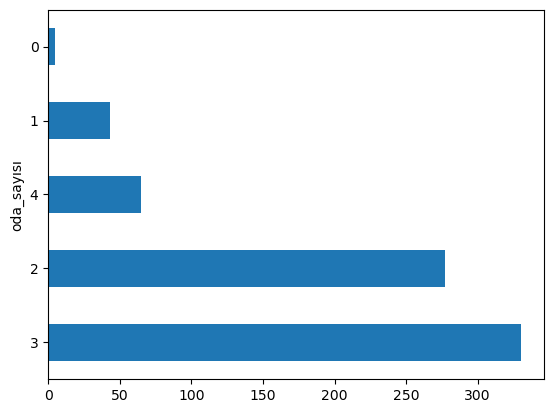

In [53]:
df.oda_sayısı.value_counts().plot.barh()

In [54]:
df.bina_yaşı.value_counts()

bina_yaşı
1    322
0    277
2    121
Name: count, dtype: int64

Text(0, 0.5, 'yaş')

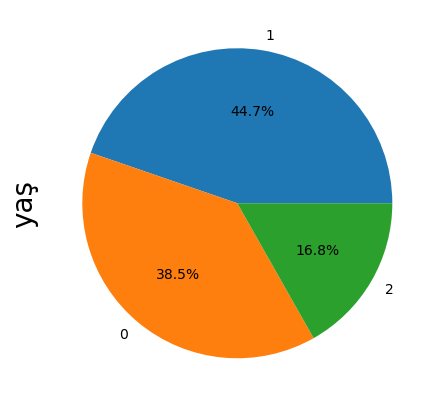

In [55]:
fig = plt.figure(figsize=(5,15))
df.bina_yaşı.value_counts().plot(kind = 'pie',autopct='%.1f%%');
plt.ylabel("yaş", fontsize = 20)

In [56]:
df.ısıtma.value_counts()

ısıtma
1    582
3     89
0     30
2     18
4      1
Name: count, dtype: int64

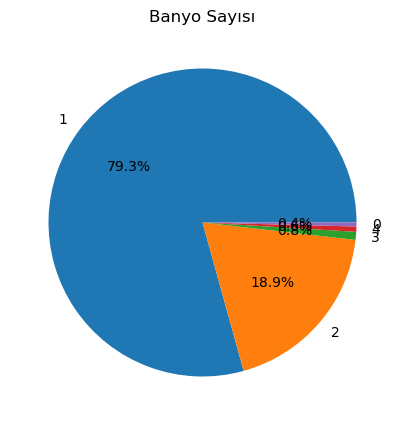

In [57]:
fig = plt.figure(figsize=(20,5))
df.banyo_sayısı.value_counts().plot(kind = 'pie',autopct='%.1f%%')
plt.ylabel("", fontsize = 20)
plt.title("Banyo Sayısı");

In [58]:
df.wc_sayısı.value_counts()

wc_sayısı
2    597
1    111
3      8
4      3
0      1
Name: count, dtype: int64

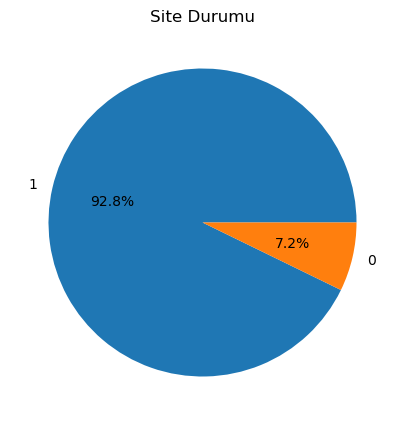

In [59]:
fig = plt.figure(figsize=(20,5))
df.site_içerisinde.value_counts().plot(kind = 'pie',autopct='%.1f%%')
plt.ylabel("", fontsize = 20)
plt.title("Site Durumu");
#sonraki adımlarda label encod etmezse sen et

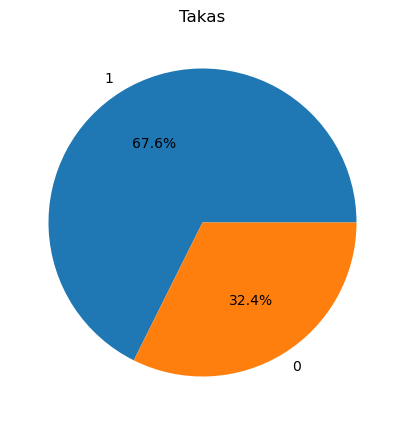

In [60]:
fig = plt.figure(figsize=(20,5))
df.takas.value_counts().plot(kind = 'pie',autopct='%.1f%%')
plt.ylabel("", fontsize = 20)
plt.title("Takas");

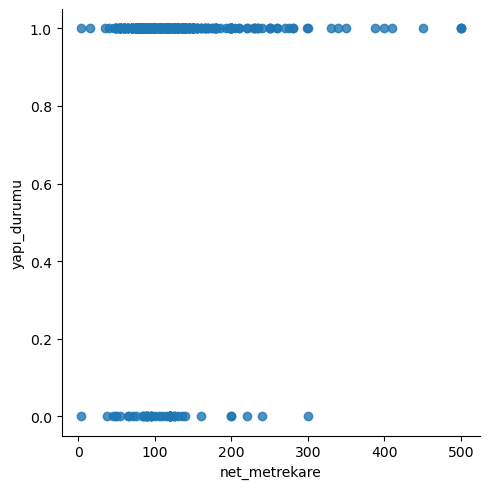

In [61]:
sns.lmplot(x = 'net_metrekare', y = 'yapı_durumu', fit_reg = False, data = df)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fiyat            720 non-null    object 
 1   net_metrekare    720 non-null    float64
 2   oda_sayısı       720 non-null    int32  
 3   dairenin_katı    720 non-null    int32  
 4   ısıtma           720 non-null    int32  
 5   banyo_sayısı     720 non-null    int32  
 6   tipi             720 non-null    int32  
 7   bina_yaşı        720 non-null    int32  
 8   site_içerisinde  720 non-null    int32  
 9   yapı_durumu      720 non-null    int32  
 10  takas            720 non-null    int32  
 11  wc_sayısı        720 non-null    int32  
 12  yapı_tipi        720 non-null    int32  
 13  aidat            720 non-null    int32  
 14  eşya_durumu      720 non-null    int32  
dtypes: float64(1), int32(13), object(1)
memory usage: 47.9+ KB


In [63]:
# Eksik Veri Sayısını Bulalım
df.isna().sum()

fiyat              0
net_metrekare      0
oda_sayısı         0
dairenin_katı      0
ısıtma             0
banyo_sayısı       0
tipi               0
bina_yaşı          0
site_içerisinde    0
yapı_durumu        0
takas              0
wc_sayısı          0
yapı_tipi          0
aidat              0
eşya_durumu        0
dtype: int64

In [64]:
#df.columns
df.shape

(720, 15)

In [65]:
for i in range(0,100):
    df["fiyat"] = df.fiyat.str.replace(',00'.format(i), '')
    df["fiyat"] = df.fiyat.str.replace(',01'.format(i), '')
    df["fiyat"] = df.fiyat.str.replace(',02'.format(i), '')
    df["fiyat"] = df.fiyat.str.replace(',03'.format(i), '')
    df["fiyat"] = df.fiyat.str.replace(',04'.format(i), '')
    df["fiyat"] = df.fiyat.str.replace(',05'.format(i), '')
    df["fiyat"] = df.fiyat.str.replace(',06'.format(i), '')
    df["fiyat"] = df.fiyat.str.replace(',07'.format(i), '')
    df["fiyat"] = df.fiyat.str.replace(',08'.format(i), '')
    df["fiyat"] = df.fiyat.str.replace(',09'.format(i), '')
    df["fiyat"] = df.fiyat.str.replace(',{}'.format(i), '')
    df["fiyat"] = df.fiyat.str.replace('.', '')


In [66]:
df['fiyat'] = df['fiyat'].astype(float)

In [67]:
df["fiyat"]

0       1200000.0
1       3300000.0
2       1320000.0
3       1850000.0
4       1575000.0
          ...    
715     2190000.0
716      850000.0
717    12000000.0
718     1350000.0
719      725000.0
Name: fiyat, Length: 720, dtype: float64

<Axes: >

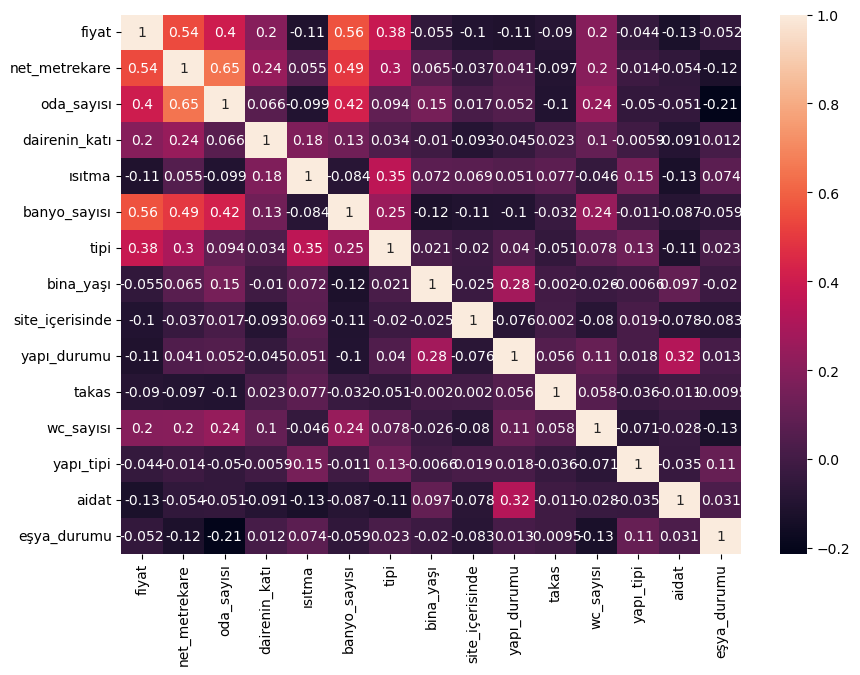

In [68]:
# Özniteliklerin korelasyonunu heatmap ile görelim 
plt.figure(figsize=(10,7))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)#1 verinin kendisi
#anlamlı değil

In [69]:
df.head(700)

,fiyat,net_metrekare,oda_sayısı,dairenin_katı,ısıtma,banyo_sayısı,tipi,bina_yaşı,site_içerisinde,yapı_durumu,takas,wc_sayısı,yapı_tipi,aidat,eşya_durumu
0,1200000.0,100.0,2,2,1,1,1,2,1,1,1,2,0,1,0
1,3300000.0,170.0,4,2,3,2,1,0,1,1,1,2,0,1,0
2,1320000.0,55.0,1,2,1,1,1,0,1,0,0,1,0,1,0
3,1850000.0,90.0,2,2,1,1,1,0,1,0,0,1,0,1,0
4,1575000.0,60.0,1,2,1,1,1,0,1,1,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2250000.0,100.0,2,2,1,1,1,2,1,1,0,2,0,1,0
696,3100000.0,250.0,4,2,1,2,1,1,1,1,1,2,0,1,0
697,1950000.0,85.0,2,2,1,1,1,1,1,1,0,2,0,1,0
698,3800000.0,145.0,4,2,1,2,1,0,0,1,0,2,0,1,0


In [70]:
df.to_csv("önişlemesonrası_data.csv",index=False)